In [1]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-14-17-10-07\opts_and_metadata.pt")  # n_faces
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-15-11-33-09\opts_and_metadata.pt")  # dropout
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-16-08-02-15\opts_and_metadata.pt")  # spk window
# file = Path(r"D:\resynth\run_48_49\many_faces\2025-07-16-17-51-37\opts_and_metadata.pt")  # weights
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-17-11-30-50\opts_and_metadata.pt")  # visibility
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-18-09-35-43\opts_and_metadata.pt")  # color
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-20-09-36-32\opts_and_metadata.pt")  # vert norm
# file = Path(r"D:\resynth\run_48_49\run00048_simp_vis_color\2025-07-21-09-26-35\opts_and_metadata.pt")  # n_blocks
# file = Path(r"D:\resynth\run_48_49\with_dirac_eigs\2025-07-22-11-48-21\opts_and_metadata.pt")  # dirac eigs
readers = Readers.from_file(file)

# to try:
# number of diffnet layers
# normalize verts?

In [3]:
for r in readers:
    print(r._meta.model_file)

D:\resynth\run_48_49\many_faces\2025-07-14-17-10-07\2025-07-14-17-10-07\diffnet_model_2025-07-14-17-10-07.pt
D:\resynth\run_48_49\many_faces\2025-07-14-17-10-07\2025-07-14-20-20-21\diffnet_model_2025-07-14-20-20-21.pt
D:\resynth\run_48_49\many_faces\2025-07-14-17-10-07\2025-07-14-23-46-37\diffnet_model_2025-07-14-23-46-37.pt
D:\resynth\run_48_49\many_faces\2025-07-14-17-10-07\2025-07-15-03-13-20\diffnet_model_2025-07-15-03-13-20.pt
D:\resynth\run_48_49\many_faces\2025-07-14-17-10-07\2025-07-15-06-13-51\diffnet_model_2025-07-15-06-13-51.pt


In [4]:
readers.hparams

,log_folder,model_file,metadata_file,input_features,channel,k_eig,learning_rate,decay_every,decay_rate,dropout,n_faces,spike_window,weight_error
0,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,hks,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 28, 9, 2...",128,0.000063,50,0.5,True,1500,"(0.07, 0.75)",response
1,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,hks,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 28, 9, 2...",128,0.000063,50,0.5,True,1250,"(0.07, 0.75)",response
2,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,hks,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 28, 9, 2...",128,0.000063,50,0.5,True,1000,"(0.07, 0.75)",response
3,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,hks,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 28, 9, 2...",128,0.000063,50,0.5,True,750,"(0.07, 0.75)",response
4,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,D:\resynth\run_48_49\many_faces\2025-07-14-17-...,hks,"(14, 17, 29, 23, 2, 0, 13, 31, 3, 26, 28, 9, 2...",128,0.000063,50,0.5,True,500,"(0.07, 0.75)",response


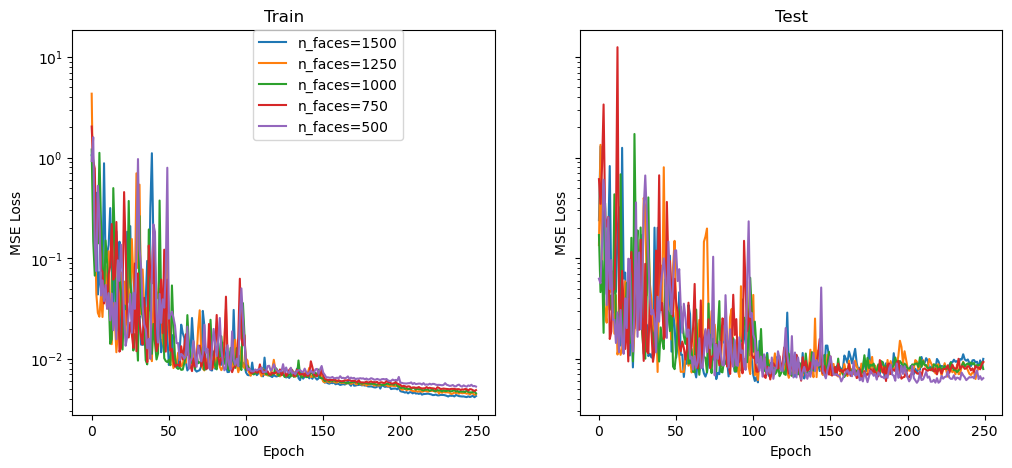

In [5]:
fig, axs = readers.plot_loss(legend=(.25, .7))

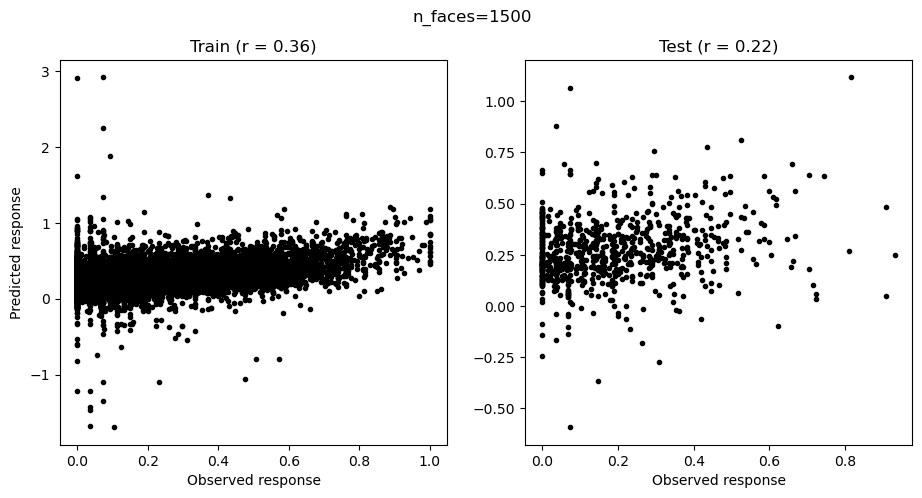

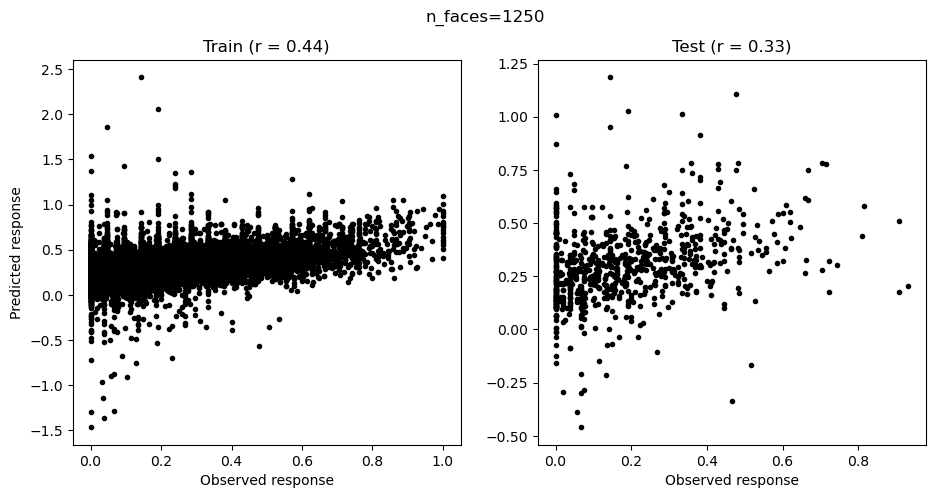

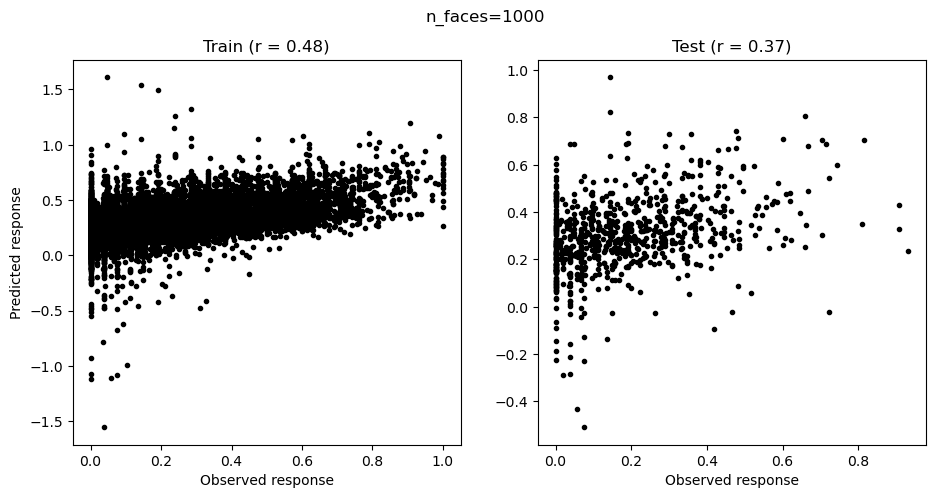

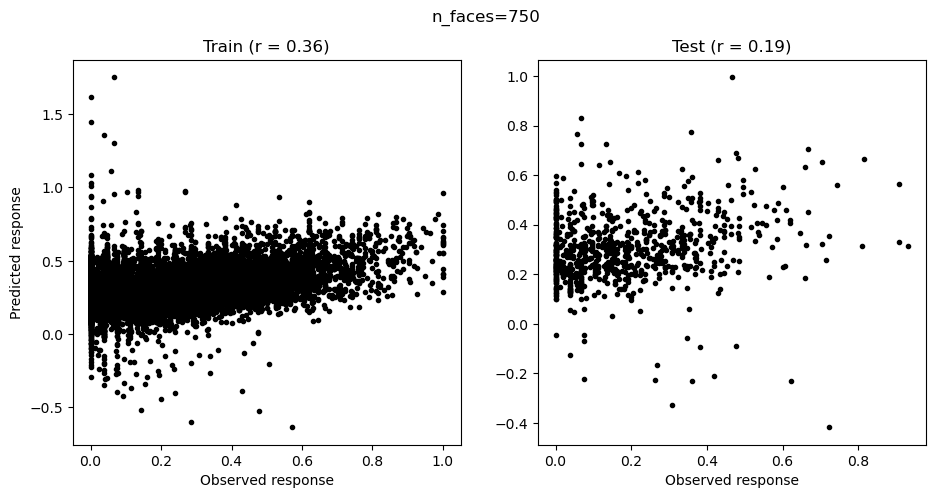

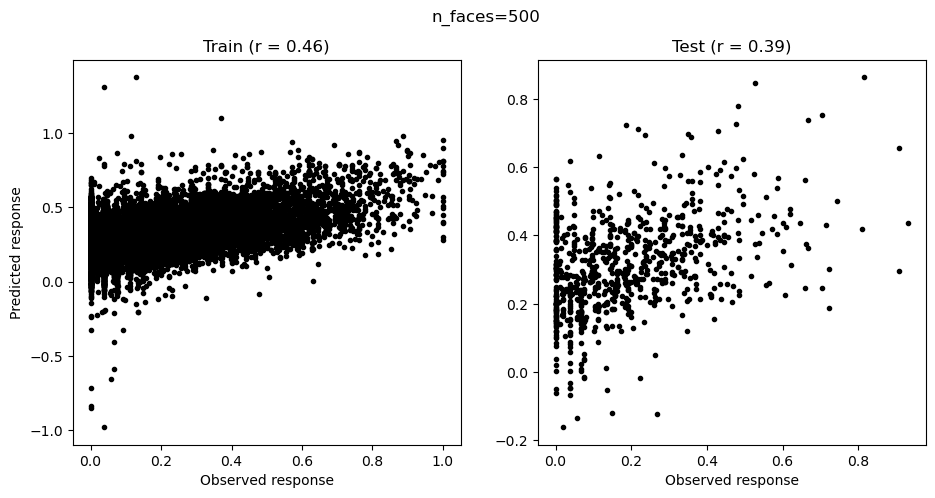

In [6]:
readers.scatter_plots(tags=None)

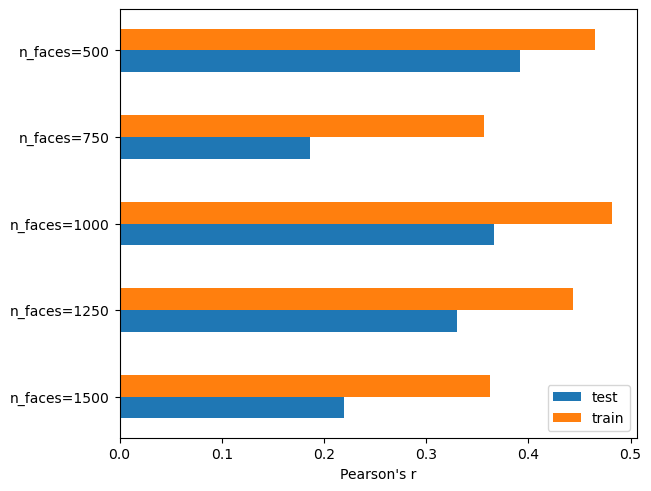

In [28]:

# ax.set_ylim(0, 250)